In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2025-09-24 01:53:39.766168: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758675219.788404 3363701 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758675219.795000 3363701 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758675219.812178 3363701 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758675219.812217 3363701 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758675219.812219 3363701 computation_placer.cc:177] computation placer alr

In [4]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1)  # this neural network has only one neuron in it
])

I0000 00:00:1758675223.206300 3363701 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46535 MB memory:  -> device: 0, name: NVIDIA RTX 6000 Ada Generation, pci bus id: 0000:09:00.0, compute capability: 8.9


In [5]:
model.compile(optimizer='sgd', loss='mean_squared_error')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

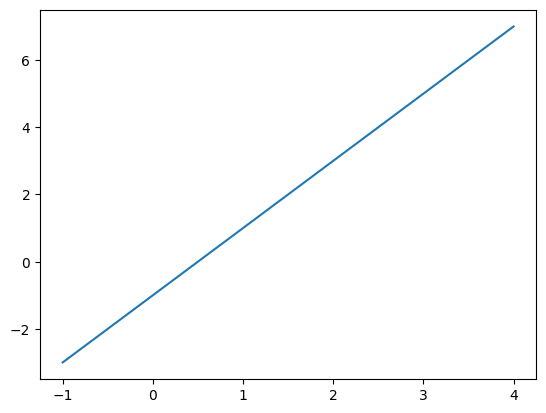

array([[1., 1.],
       [1., 1.]])

In [6]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)
plt.plot(xs, ys)
plt.show()
np.corrcoef(xs, ys)

In [11]:
class myCallback(tf.keras.callbacks.Callback):
    '''
    Hals training when the loss balls below a certain defined number.
    
    Atgs:
        epoch (integer) - index of epoch. Required but unused in teh function definition below.
        logs (dict) - metric results from the training epoch.
    '''
    def on_epoch_end(self, epoch, logs=None):
        if logs['loss'] < 0.1:
            print('loss is lower than required threshold. Cancelling training in consequence.')
            self.model.stop_training = True

In [12]:
model.fit(xs, ys, epochs=100, callbacks=[myCallback()])

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.4809
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4710
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.4613
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.4519
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4426
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4335
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.4246
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.4158
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.4073
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3989
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3907
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3827
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3749
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3672
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3596
Epoch 16/100
1/1 ━━

In [13]:
# evaluate the trained model
model.predict(np.array([10.0]))  # should be 19 in an ideal world

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[18.080572]], dtype=float32)

In [41]:
# compute error metrics of trained model 

# Ideal relationship: y = 2x - 1
x_value = 10.0
actual = 2 * x_value - 1  # Calculate the true value from the ideal relationship

# Prediction from the model
prediction = model.predict(np.array([x_value]))  # Prediction might be a numpy array

# Access the scalar value from prediction array

# Calculate the errors
errors = prediction_value - actual

# Calculate MSE (Mean Squared Error)
mse = np.square(errors).mean()

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calculate MAE (Mean Absolute Error)
mae = np.abs(errors).mean()

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.abs(errors / x_value).mean()

# Print the error metrics
print(f"true value (y): {actual}")
print(f"predicted Value: {prediction}")  # Now using prediction_value, which is a scalar
print(f"prediction error: {errors}")
print(f"mean squared Error (mse): {mse}")
print(f"root mean squared error (rmse): {rmse}")
print(f"mean absolute error (): {mae}")
print(f"mean absolute percentage error (mape): {mape}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
true value (y): 19.0
predicted Value: [[18.080572]]
prediction error: [[-0.9194279]]
mean squared Error (mse): 0.8453475832939148
root mean squared error (rmse): 0.9194278717041016
mean absolute error (): 0.9194278717041016
mean absolute percentage error (mape): 0.09194278717041016%


In [42]:
# convert the .ipynb to a .py file
# !jupyter nbconvert --to script TFLearningLinearRegression.ipynb

[NbConvertApp] Converting notebook TFLearningLinearRegression.ipynb to script
[NbConvertApp] Writing 2472 bytes to TFLearningLinearRegression.py
